# Association Rules

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Notebook Content</h3>
   <a class="list-group-item list-group-item-action" data-toggle="list" href="#Introduction" role="tab" aria-controls="settings">Introduction<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Market-Basket-Analysis" role="tab" aria-controls="settings">Market Basket Analysis<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Data-Preprocessing" role="tab" aria-controls="settings">Data Preprocessing<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Apriori-Algorithm" role="tab" aria-controls="settings">Apriori Algorithm<span class="badge badge-primary badge-pill"></span></a> 
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#FP-Growth-Algorithm" role="tab" aria-controls="settings">FP growth Algorithm<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Comapring-both-algorithm-with-runtime" role="tab" aria-controls="settings">Comapring both algorithm with runtime<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Conclusion" role="tab" aria-controls="settings">Conclusion<span class="badge badge-primary badge-pill"></span></a>
    </div>

# Introduction

Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules

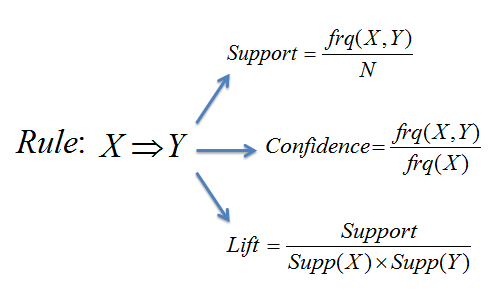

An example of Association Rules<br>
<br>Assume there are 100 customers
<br>10 of them bought milk, 8 bought butter and 6 bought both of them.
<br>bought milk => bought butter
<br>support = P(Milk & Butter) = 6/100 = 0.06
<br>confidence = support/P(Butter) = 0.06/0.08 = 0.75
<br>lift = confidence/P(Milk) = 0.75/0.10 = 7.5
<br>**Note:** this example is extremely small. In practice, a rule needs the support of several hundred transactions, before it can be considered statistically significant, and datasets often contain thousands or millions of transactions.

**Difference between Association and Recommendation**
Association rules do not extract an individual's preference, rather find relationships between sets of elements of every distinct transaction. This is what makes them different than Collaborative filtering which is used in recommendation systems.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Association-Rules" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

# Market Basket Analysis

Market Basket Analysis is a technique which identifies the strength of association between pairs of products purchased together and identify patterns of co-occurrence. A co-occurrence is when two or more things take place together.

Market Basket Analysis creates If-Then scenario rules, for example, if item A is purchased then item B is likely to be purchased. The rules are probabilistic in nature or, in other words, they are derived from the frequencies of co-occurrence in the observations. Frequency is the proportion of baskets that contain the items of interest. The rules can be used in pricing strategies, product placement, and various types of cross-selling strategies.


**Practical Applications of Market Basket Analysis**

When one hears Market Basket Analysis, one thinks of shopping carts and supermarket shoppers. It is important to realize that there are many other areas in which Market Basket Analysis can be applied. An example of Market Basket Analysis for a majority of Internet users is a list of potentially interesting products for Amazon. Amazon informs the customer that people who bought the item being purchased by them, also reviewed or bought another list of items. A list of applications of Market Basket Analysis in various industries is listed below:

1. **Retail:** In Retail, Market Basket Analysis can help determine what items are purchased together, purchased sequentially, and purchased by season. This can assist retailers to determine product placement and promotion optimization (for instance, combining product incentives). Does it make sense to sell soda and chips or soda and crackers?

2. **Telecommunications:** In Telecommunications, where high churn rates continue to be a growing concern, Market Basket Analysis can be used to determine what services are being utilized and what packages customers are purchasing. They can use that knowledge to direct marketing efforts at customers who are more likely to follow the same path.
For instance, Telecommunications these days is also offering TV and Internet. Creating bundles for purchases can be determined from an analysis of what customers purchase, thereby giving the company an idea of how to price the bundles. This analysis might also lead to determining the capacity requirements.

3. **Banks:** In Financial (banking for instance), Market Basket Analysis can be used to analyze credit card purchases of customers to build profiles for fraud detection purposes and cross-selling opportunities.

4. **Insurance:** In Insurance, Market Basket Analysis can be used to build profiles to detect medical insurance claim fraud. By building profiles of claims, you are able to then use the profiles to determine if more than 1 claim belongs to a particular claimee within a specified period of time.

5. **Medical:** In Healthcare or Medical, Market Basket Analysis can be used for comorbid conditions and symptom analysis, with which a profile of illness can be better identified. It can also be used to reveal biologically relevant associations between different genes or between environmental effects and gene expression.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Association-Rules" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

# Problem Statement 

To demostrate the items which can be closely associated to each other on certain features and aspects. We are using online retail data to show the implementation of these algorithms

# Data-Preprocessing

**Step 1:** Importing the required libraries

In [1]:
#!pip install mlxtend

In [1]:
import numpy as np 
import pandas as pd

**Step 2:** Loading and exploring the data

In [5]:
# Loading the Data 
data = pd.read_csv(r"C:\Users\mohitkumar\Downloads\dataset\dataset\OnlineRetail.csv") 
data.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# Exploring the columns of the data 
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
# Exploring the different regions of transactions 
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

**Step 3:** Cleaning the Data

In [8]:
# Stripping extra spaces in the description 
data['Description'] = data['Description'].str.strip() 
  
# Dropping the rows without any invoice number 
data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True) 
data['InvoiceNo'] = data['InvoiceNo'].astype('str') 
  
# Dropping all transactions which were done on credit 
data = data[~data['InvoiceNo'].str.contains('C')] 

**Step 4:** Splitting the data according to the region of transaction

**Note: The data should be in transactional format i.e. all the products should be grouped to their respective transaction ID's.**

In [13]:
# Transactions done in France 
basket_France = (data[data['Country'] =="France"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
  
# Transactions done in the United Kingdom 
basket_UK = (data[data['Country'] =="United Kingdom"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
  
# Transactions done in Portugal 
basket_Por = (data[data['Country'] =="Portugal"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
  
basket_Sweden = (data[data['Country'] =="Sweden"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

**Step 5:** Hot encoding the Data

Quantity of each item is not important, we need to check whether a particular item was part of a particular transaction or not.

In [11]:
# Defining the hot encoding function to make the data suitable  
# for the concerned libraries 
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1
  
 # Encoding the datasets 
basket_encoded = basket_France.applymap(hot_encode) 
basket_France = basket_encoded 
  
basket_encoded = basket_UK.applymap(hot_encode) 
basket_UK = basket_encoded 
  
basket_encoded = basket_Por.applymap(hot_encode) 
basket_Por = basket_encoded 
  
basket_encoded = basket_Sweden.applymap(hot_encode) 
basket_Sweden = basket_encoded

In [14]:
basket_France

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Association-Rules" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

### Buliding the models and analyzing the results using the encoded and cleaned data

**Step 6:** Buliding the models and analyzing the results

### Apriori Algorithm
Apriori Algorithm is a Machine Learning algorithm which is used to gain insight into the structured relationships between different items involved. The most prominent practical application of the algorithm is to recommend products based on the products already present in the user’s cart. Walmart especially has made great use of the algorithm in suggesting products to it’s users.

In [45]:
#importing apriori algorithm and association_rules
from mlxtend.frequent_patterns import apriori, association_rules

**France:**

In [9]:
# Building the model 
frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head()) 

                                           antecedents  \
45                        (JUMBO BAG WOODLAND ANIMALS)   
258  (PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...   
271  (RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...   
300  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
301  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   

                         consequents  antecedent support  consequent support  \
45                         (POSTAGE)            0.076531            0.765306   
258                        (POSTAGE)            0.051020            0.765306   
271                        (POSTAGE)            0.053571            0.765306   
300  (SET/6 RED SPOTTY PAPER PLATES)            0.102041            0.127551   
301    (SET/6 RED SPOTTY PAPER CUPS)            0.102041            0.137755   

      support  confidence      lift  leverage  conviction  
45   0.076531       1.000  1.306667  0.017961         inf  
258  0.051020       1.000  1.306667  0.011974     

From the above output, it can be seen that paper cups and paper and plates are bought together in France. This is because the French have a culture of having a get-together with their friends and family atleast once a week. Also, since the French government has banned the use of plastic in the country, the people have to purchase the paper -based alternatives.

**Portugal :**

In [10]:
frq_items = apriori(basket_Por, min_support = 0.05, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head()) 

                             antecedents                          consequents  \
1170    (SET 12 COLOUR PENCILS SPACEBOY)   (SET 12 COLOUR PENCILS DOLLY GIRL)   
1171  (SET 12 COLOUR PENCILS DOLLY GIRL)     (SET 12 COLOUR PENCILS SPACEBOY)   
1172  (SET 12 COLOUR PENCILS DOLLY GIRL)   (SET OF 4 KNICK KNACK TINS LONDON)   
1173  (SET OF 4 KNICK KNACK TINS LONDON)   (SET 12 COLOUR PENCILS DOLLY GIRL)   
1174  (SET 12 COLOUR PENCILS DOLLY GIRL)  (SET OF 4 KNICK KNACK TINS POPPIES)   

      antecedent support  consequent support   support  confidence       lift  \
1170            0.051724            0.051724  0.051724         1.0  19.333333   
1171            0.051724            0.051724  0.051724         1.0  19.333333   
1172            0.051724            0.051724  0.051724         1.0  19.333333   
1173            0.051724            0.051724  0.051724         1.0  19.333333   
1174            0.051724            0.051724  0.051724         1.0  19.333333   

      leverage  conviction

On analyzing the association rules for Portuguese transactions, it is observed that Tiffin sets (Knick Knack Tins) and colour pencils. These two products typically belong to a primary school going kid. These two products are required by children in school to carry their lunch and for creative work respectively and hence are logically make sense to be paired together.

**Sweden:**

In [37]:
frq_items = apriori(basket_Sweden, min_support = 0.05, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head())

                        antecedents                        consequents  \
0     (12 PENCILS SMALL TUBE SKULL)      (PACK OF 72 SKULL CAKE CASES)   
1     (PACK OF 72 SKULL CAKE CASES)      (12 PENCILS SMALL TUBE SKULL)   
4    (ASSORTED BOTTLE TOP  MAGNETS)            (36 DOILIES DOLLY GIRL)   
5           (36 DOILIES DOLLY GIRL)     (ASSORTED BOTTLE TOP  MAGNETS)   
180  (CHILDRENS CUTLERY DOLLY GIRL)  (CHILDRENS CUTLERY CIRCUS PARADE)   

     antecedent support  consequent support   support  confidence  lift  \
0              0.055556            0.055556  0.055556         1.0  18.0   
1              0.055556            0.055556  0.055556         1.0  18.0   
4              0.055556            0.055556  0.055556         1.0  18.0   
5              0.055556            0.055556  0.055556         1.0  18.0   
180            0.055556            0.055556  0.055556         1.0  18.0   

     leverage  conviction  
0    0.052469         inf  
1    0.052469         inf  
4    0.052469       

On analyzing the above rules, it is found that boys’ and girls’ cutlery are paired together. This makes practical sense because when a parent goes shopping for cutlery for his/her children, he/she would want the product to be a little customized according to the kid’s wishes.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Association-Rules" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

### FP Growth Algorithm

FP-growth is an improved version of the Apriori Algorithm which is widely used for frequent pattern mining(AKA Association Rule Mining). It is used as an analytical process that finds frequent patterns or associations from data sets. For example, grocery store transaction data might have a frequent pattern that people usually buy chips and beer together. The Apriori Algorithm produces frequent patterns by generating itemsets and discovering the most frequent itemset over a threshold “minimal support count”. It greatly reduces the size of the itemset in the database by one simple principle:
If an itemset is frequent, then all of its subsets must also be frequent.

In [12]:
#importing fpgrowth algorithm
from mlxtend.frequent_patterns import fpgrowth

**France:**

In [48]:
frq_items=fpgrowth(basket_France, min_support=0.05,use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head())

                                           antecedents  \
115  (RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...   
272  (PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...   
329                       (JUMBO BAG WOODLAND ANIMALS)   
220  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
221  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   

                         consequents  antecedent support  consequent support  \
115                        (POSTAGE)            0.053571            0.765306   
272                        (POSTAGE)            0.051020            0.765306   
329                        (POSTAGE)            0.076531            0.765306   
220  (SET/6 RED SPOTTY PAPER PLATES)            0.102041            0.127551   
221    (SET/6 RED SPOTTY PAPER CUPS)            0.102041            0.137755   

      support  confidence      lift  leverage  conviction  
115  0.053571       1.000  1.306667  0.012573         inf  
272  0.051020       1.000  1.306667  0.011974     

**Portugal:**

In [33]:
frq_items=fpgrowth(basket_Por, min_support=0.05,use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head())

                                             antecedents  \
13224    (PLASTERS IN TIN SPACEBOY, LUNCH BAG CARS BLUE)   
13226  (PLASTERS IN TIN SPACEBOY, LUNCH BAG PINK POLK...   
13227  (PLASTERS IN TIN CIRCUS PARADE, LUNCH BAG CARS...   
13229  (PLASTERS IN TIN CIRCUS PARADE, LUNCH BAG PINK...   
13239  (PLASTERS IN TIN CIRCUS PARADE, LUNCH BAG CARS...   

                                             consequents  antecedent support  \
13224  (PLASTERS IN TIN CIRCUS PARADE, LUNCH BAG PINK...            0.051724   
13226  (PLASTERS IN TIN CIRCUS PARADE, LUNCH BAG CARS...            0.051724   
13227  (PLASTERS IN TIN SPACEBOY, LUNCH BAG PINK POLK...            0.051724   
13229    (PLASTERS IN TIN SPACEBOY, LUNCH BAG CARS BLUE)            0.051724   
13239  (PLASTERS IN TIN VINTAGE PAISLEY, LUNCH BAG PI...            0.051724   

       consequent support   support  confidence       lift  leverage  \
13224            0.051724  0.051724         1.0  19.333333  0.049049   
13226         

**Sweden:**

In [40]:
frq_items=fpgrowth(basket_Sweden, min_support=0.05,use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head())

                                           antecedents  \
120  (MINI PAINT SET VINTAGE, PACK OF 72 RETROSPOT ...   
122  (MINI PAINT SET VINTAGE, PACK OF 60 SPACEBOY C...   
123  (PACK OF 72 RETROSPOT CAKE CASES, RETROSPOT TE...   
125  (RETROSPOT TEA SET CERAMIC 11 PC, PACK OF 60 S...   
149  (SET OF 3 CAKE TINS PANTRY DESIGN, RETROSPOT T...   

                                           consequents  antecedent support  \
120  (RETROSPOT TEA SET CERAMIC 11 PC, PACK OF 60 S...            0.055556   
122  (PACK OF 72 RETROSPOT CAKE CASES, RETROSPOT TE...            0.055556   
123  (MINI PAINT SET VINTAGE, PACK OF 60 SPACEBOY C...            0.055556   
125  (MINI PAINT SET VINTAGE, PACK OF 72 RETROSPOT ...            0.055556   
149  (MINI PAINT SET VINTAGE, PACK OF 72 RETROSPOT ...            0.055556   

     consequent support   support  confidence  lift  leverage  conviction  
120            0.055556  0.055556         1.0  18.0  0.052469         inf  
122            0.055556  0.055

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Association-Rules" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

## Comparing both algorithm with runtime

In [78]:
#min_support is low
print('Apriori performance :')
%timeit -n 100 -r 10 apriori(basket_Sweden, min_support=0.1)
%timeit -n 100 -r 10 apriori(basket_Sweden, min_support=0.1, low_memory=True)
print('\nFP growth performance :')
%timeit -n 100 -r 10 fpgrowth(basket_Sweden, min_support=0.1)

Apriori performance :
4.47 ms ± 78.8 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
4.99 ms ± 219 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)

FP growth performance :
3.64 ms ± 356 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [79]:
#min_support is high
print('Apriori performance :')
%timeit -n 100 -r 10 apriori(basket_Sweden, min_support=0.7)
%timeit -n 100 -r 10 apriori(basket_Sweden, min_support=0.7, low_memory=True)
print('FP growth performance :')
%timeit -n 100 -r 10 fpgrowth(basket_Sweden, min_support=0.7)

Apriori performance :
3.16 ms ± 247 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
2.94 ms ± 72.3 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)

FP growth performance :
2.37 ms ± 16.4 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [84]:
#Changing the data-set
print('Apriori performance :')
%timeit -n 100 -r 10 apriori(basket_Por, min_support=0.5)
%timeit -n 100 -r 10 apriori(basket_Por, min_support=0.5, low_memory=True)
print('\nFP growth performance :')
%timeit -n 100 -r 10 fpgrowth(basket_Por, min_support=0.5)

Apriori performance :
4.36 ms ± 306 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
5.1 ms ± 345 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)

FP growth performance :
4.15 ms ± 28.5 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Association-Rules" role="tab" aria-controls="settings">Go To Top<span class="badge badge-primary badge-pill"></span></a>

# Conclusion

* FP growth algorithm works faster than apriori algorithm at low min_support and have an edge even at high min_support
* A noticable time difference can be observed as the size of data-set increases. Hence FP growth performs better with large dataset.
* Selection of algorithm depends on memory, time and data size. Refer handbook for substantial pros and cons.
* **min_support** values can be tweaked to increase/decrease the number of association rules.